# Modeling

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# For web scraping
import requests
from bs4 import BeautifulSoup
import seaborn as sns
# For performing regex operations
import re

# For adding delays so that we don't spam requests
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm #used for plotting
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # 1. Import the scaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from numpy import unique

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import svm

# The classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Read the NBA and NCAA data cleaned from EDA

In [2]:
nba = pd.read_csv('~/Downloads/allseasonsnba.csv')

In [3]:
ncaa = pd.read_csv('~/Downloads/clean_ncaa_data.csv')

In [4]:
ncaa.drop(columns='Unnamed: 0',inplace=True)

grab the draft info table as we will need to merge this table to the NBA data set

In [5]:
draft = pd.read_csv('~/Downloads/all_seasons.csv')
draft

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


average out all the players careers

In [6]:
career_avg = pd.DataFrame(nba.groupby(['Player']).mean().round(2))
career_avg

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,11593.33,1993.89,29.89,75.61,50.28,2169.11,13.87,0.54,0.05,0.44,...,0.71,198.67,364.06,562.72,81.61,61.28,31.22,83.78,143.39,718.22
A.J. Bramlett,14526.00,2000.00,23.00,8.00,0.00,61.00,-0.40,0.19,0.00,0.00,...,0.68,12.00,10.00,22.00,0.00,1.00,0.00,3.00,13.00,8.00
A.J. English,10356.50,1991.50,23.50,75.50,9.00,1554.00,11.55,0.48,0.05,0.24,...,0.77,70.00,87.50,157.50,160.00,28.50,12.00,101.50,143.50,751.00
A.J. Guyton,15669.00,2002.00,23.00,26.67,4.67,415.33,4.37,0.32,0.37,0.07,...,0.81,7.33,19.33,26.67,49.00,6.67,4.00,20.67,19.33,147.33
A.J. Hammons,24304.00,2017.00,24.00,22.00,0.00,163.00,8.40,0.47,0.24,0.48,...,0.45,8.00,28.00,36.00,4.00,1.00,13.00,10.00,21.00,48.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zelmo Beaty*,4118.00,1975.00,35.00,69.00,9.00,1213.00,12.80,0.51,0.00,0.44,...,0.80,93.00,234.00,327.00,74.00,45.00,29.00,12.80,130.00,380.00
Zendon Hamilton,16827.50,2004.12,28.12,18.25,1.88,201.12,13.40,0.49,0.00,1.13,...,0.68,23.38,36.00,59.38,4.12,5.38,3.50,14.25,27.50,76.38
Zoran Dragic,23033.00,2015.00,25.00,10.67,0.67,50.00,8.43,0.41,0.50,0.21,...,0.59,3.33,2.00,5.33,3.33,1.33,0.00,3.33,4.00,18.67


create a mini table of just the players name and their draft round and pick

In [7]:
merge_table = pd.DataFrame()
merge_table['Player'] = draft['player_name']
merge_table['draft_round'] = draft['draft_round']
merge_table['draft_number'] = draft['draft_number']
merge_table

,Player,draft_round,draft_number
0,Dennis Rodman,2,27
1,Dwayne Schintzius,1,24
2,Earl Cureton,3,58
3,Ed O'Bannon,1,9
4,Ed Pinckney,1,10
...,...,...,...
11140,Maxi Kleber,Undrafted,Undrafted
11141,Melvin Frazier Jr.,2,35
11142,Meyers Leonard,1,11
11143,Norvel Pelle,Undrafted,Undrafted


merge the nba career averages table and the above table to create a table for linear and logistics regression as the draft info is a target while the others are features

In [8]:
c = pd.merge(career_avg,merge_table,on='Player')
c = c.drop_duplicates()
c['draft_round'] = c['draft_round'].replace({'Undrafted': 0})
c['draft_number'] = c['draft_number'].replace({'Undrafted': 0})
#c.loc[c['draft_round'] =='Undrafted'] = 0
#c.loc[c['draft_number'] =='Undrafted'] = 0
c

,Player,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,draft_round,draft_number
0,A.C. Green,11593.33,1993.89,29.89,75.61,50.28,2169.11,13.87,0.54,0.05,...,364.06,562.72,81.61,61.28,31.22,83.78,143.39,718.22,1,23
5,A.J. Bramlett,14526.00,2000.00,23.00,8.00,0.00,61.00,-0.40,0.19,0.00,...,10.00,22.00,0.00,1.00,0.00,3.00,13.00,8.00,2,39
6,A.J. Guyton,15669.00,2002.00,23.00,26.67,4.67,415.33,4.37,0.32,0.37,...,19.33,26.67,49.00,6.67,4.00,20.67,19.33,147.33,2,32
9,Aaron Brooks,21530.73,2012.60,27.60,53.13,15.07,1139.20,12.33,0.51,0.42,...,69.13,90.67,165.67,31.27,7.53,84.80,102.93,522.60,1,26
19,Aaron Gordon,23690.67,2016.00,20.00,68.33,39.00,1652.67,14.27,0.53,0.26,...,255.00,360.33,103.67,48.00,39.00,64.33,136.00,660.33,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,Zeljko Rebraca,16945.57,2004.00,31.00,34.14,3.43,507.57,12.73,0.56,0.00,...,75.29,106.57,13.43,8.86,24.43,31.43,80.57,195.29,2,54
10064,Zendon Hamilton,16827.50,2004.12,28.12,18.25,1.88,201.12,13.40,0.49,0.00,...,36.00,59.38,4.12,5.38,3.50,14.25,27.50,76.38,0,0
10070,Zoran Dragic,23033.00,2015.00,25.00,10.67,0.67,50.00,8.43,0.41,0.50,...,2.00,5.33,3.33,1.33,0.00,3.33,4.00,18.67,0,0
10071,Zoran Planinic,17488.33,2005.00,22.00,49.33,3.33,528.00,9.80,0.49,0.26,...,50.33,66.00,55.00,19.33,2.33,40.00,79.00,187.00,1,22


Drop all the target variables for our X

In [9]:
X = c.drop(columns=['draft_round','draft_number','Player','Year','Age','Unnamed: 0'])
X

,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,75.61,50.28,2169.11,13.87,0.54,0.05,0.44,10.39,18.81,14.66,...,0.71,198.67,364.06,562.72,81.61,61.28,31.22,83.78,143.39,718.22
5,8.00,0.00,61.00,-0.40,0.19,0.00,0.00,21.70,18.50,20.10,...,0.68,12.00,10.00,22.00,0.00,1.00,0.00,3.00,13.00,8.00
6,26.67,4.67,415.33,4.37,0.32,0.37,0.07,1.37,3.80,2.53,...,0.81,7.33,19.33,26.67,49.00,6.67,4.00,20.67,19.33,147.33
9,53.13,15.07,1139.20,12.33,0.51,0.42,0.18,2.24,6.46,4.35,...,0.83,21.53,69.13,90.67,165.67,31.27,7.53,84.80,102.93,522.60
19,68.33,39.00,1652.67,14.27,0.53,0.26,0.29,6.90,17.73,12.23,...,0.70,105.33,255.00,360.33,103.67,48.00,39.00,64.33,136.00,660.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,34.14,3.43,507.57,12.73,0.56,0.00,0.37,7.74,15.46,11.66,...,0.75,31.29,75.29,106.57,13.43,8.86,24.43,31.43,80.57,195.29
10064,18.25,1.88,201.12,13.40,0.49,0.00,1.13,10.28,20.16,15.16,...,0.68,23.38,36.00,59.38,4.12,5.38,3.50,14.25,27.50,76.38
10070,10.67,0.67,50.00,8.43,0.41,0.50,0.21,10.13,5.63,7.87,...,0.59,3.33,2.00,5.33,3.33,1.33,0.00,3.33,4.00,18.67
10071,49.33,3.33,528.00,9.80,0.49,0.26,0.40,3.53,11.37,7.43,...,0.68,15.67,50.33,66.00,55.00,19.33,2.33,40.00,79.00,187.00


Lets now create two targets, draft round and pick

In [10]:
y1 = pd.DataFrame(c['draft_round'])
y2 = pd.DataFrame(c['draft_number'])

## Linear Regression|

Lets do this for draft round as our target

add a constant column of 1's to our features

In [11]:
X_withconstant = sm.add_constant(X)
type(X_withconstant)

pandas.core.frame.DataFrame

The process is to just fit and check R and R^2 values, and start dropping to see what happens and just reapet this process. This just describes whats going on in the code, this model will not be chosen, I'm simply showing the results to show this wasn't an option

High P-values were dropped, and then repeated untill all the features left have a p-value of < 0.05

In [12]:
# 1. Instantiate model
lm_ = sm.OLS(y1.astype(int),X_withconstant.astype(float))

# 2. Fit model
lm_model = lm_.fit()

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            draft_round   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.459
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           3.56e-07
Time:                        19:16:11   Log-Likelihood:                -2147.6
No. Observations:                1799   AIC:                             4387.
Df Residuals:                    1753   BIC:                             4640.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6720      0.341      1.972      0.049       0.004       1.340
G              0.0117      0.003      3.513      0.000       0.005       0.018
GS            -0.0012      0.003     -0.380      0.704      -0.008       0.005
MP          1.307e-05      0.000      0.050      0.960      -0.000       0.001
PER           -0.0045      0.022     -0.206      0.837      -0.047       0.038
TS%            0.8644      1.072      0.807      0.420      -1.237       2.966
3PAr          -0.5781      0.428     -1.350      0.177      -1.418       0.261
FTr           -0.0119      0.134     -0.089      0.929      -0.275       0.252
ORB%           0.0008      0.065      0.012      0.991      -0.126       0.127
DRB%          -0.0165      0.062     -0.265      0.791      -0.139       0.106
TRB%           0.0146      0.124      0.118      0.906      -0.228       0.258
AST%           0.0041      0.005      0.789      0.430      -0.006       0.014
STL%          -0.0556      0.036     -1.538      0.124      -0.126       0.015
BLK%          -0.0289      0.029     -0.999      0.318      -0.086       0.028
TOV%          -0.0106      0.005     -2.011      0.045      -0.021      -0.000
USG%           0.0152      0.010      1.454      0.146      -0.005       0.036
OWS           -0.5983      0.711     -0.842      0.400      -1.993       0.796
DWS           -0.6781      0.713     -0.951      0.342      -2.077       0.721
WS             0.5474      0.710      0.772      0.440      -0.844       1.939
WS/48          1.0459      1.195      0.875      0.382      -1.298       3.390
OBPM           0.1710      0.666      0.257      0.797      -1.136       1.478
DBPM           0.2516      0.667      0.377      0.706      -1.056       1.559
BPM           -0.2130      0.666     -0.320      0.749      -1.520       1.094
VORP           0.1369      0.102      1.337      0.181      -0.064       0.338
FG             9.2261      7.897      1.168      0.243      -6.262      24.715
FGA           -0.9048      1.639     -0.552      0.581      -4.119       2.310
FG%           -3.0120      2.851     -1.056      0.291      -8.604       2.580
3P            -3.0981      5.614     -0.552      0.581     -14.110       7.914
3PA            0.9005      1.639      0.549      0.583      -2.314       4.115
3P%           -0.7117      0.247     -2.877      0.004      -1.197      -0.227
2P            -5.1450      4.614     -1.115      0.265     -14.194       3.904
2PA            0.9036      1.639      0.551      0.581      -2.311       4.118
2P%            0.8573      0.670      1.280      0.201      -0.456       2.171
eFG%           1.7217      2.464      0.699      0.485      -3.111       6.554
FT             2.0409      3.202      0.637      0.524      -4.240       8.322
FTA           -0.0010      0.003     -0.391      0.696      -0.006       0.004
FT

In [13]:
X_withconstant.drop(columns='MP',inplace=True)
X_withconstant.head()

,const,G,GS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,75.61,50.28,13.87,0.54,0.05,0.44,10.39,18.81,14.66,...,0.71,198.67,364.06,562.72,81.61,61.28,31.22,83.78,143.39,718.22
5,1.0,8.00,0.00,-0.40,0.19,0.00,0.00,21.70,18.50,20.10,...,0.68,12.00,10.00,22.00,0.00,1.00,0.00,3.00,13.00,8.00
6,1.0,26.67,4.67,4.37,0.32,0.37,0.07,1.37,3.80,2.53,...,0.81,7.33,19.33,26.67,49.00,6.67,4.00,20.67,19.33,147.33
9,1.0,53.13,15.07,12.33,0.51,0.42,0.18,2.24,6.46,4.35,...,0.83,21.53,69.13,90.67,165.67,31.27,7.53,84.80,102.93,522.60
19,1.0,68.33,39.00,14.27,0.53,0.26,0.29,6.90,17.73,12.23,...,0.70,105.33,255.00,360.33,103.67,48.00,39.00,64.33,136.00,660.33


In [14]:
# 1. Instantiate model
lm_ = sm.OLS(y1.astype(int),X_withconstant.astype(float))

# 2. Fit model
lm_model = lm_.fit()

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            draft_round   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     2.516
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.20e-07
Time:                        19:16:11   Log-Likelihood:                -2147.6
No. Observations:                1799   AIC:                             4385.
Df Residuals:                    1754   BIC:                             4633.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6736      0.339      1.987      0.047       0.009       1.339
G              0.0118      0.003      3.767      0.000       0.006       0.018
GS            -0.0012      0.003     -0.398      0.690      -0.007       0.005
PER           -0.0043      0.021     -0.201      0.841      -0.046       0.038
TS%            0.8705      1.064      0.818      0.413      -1.217       2.958
3PAr          -0.5785      0.428     -1.352      0.177      -1.418       0.261
FTr           -0.0118      0.134     -0.088      0.930      -0.275       0.252
ORB%           0.0004      0.064      0.006      0.995      -0.125       0.126
DRB%          -0.0169      0.062     -0.274      0.784      -0.138       0.104
TRB%           0.0153      0.123      0.124      0.901      -0.226       0.257
AST%           0.0041      0.005      0.788      0.431      -0.006       0.014
STL%          -0.0557      0.036     -1.550      0.121      -0.126       0.015
BLK%          -0.0290      0.029     -1.004      0.315      -0.086       0.028
TOV%          -0.0106      0.005     -2.024      0.043      -0.021      -0.000
USG%           0.0151      0.010      1.495      0.135      -0.005       0.035
OWS           -0.5985      0.711     -0.842      0.400      -1.992       0.795
DWS           -0.6785      0.713     -0.952      0.341      -2.077       0.720
WS             0.5491      0.709      0.775      0.439      -0.841       1.939
WS/48          1.0309      1.157      0.891      0.373      -1.239       3.301
OBPM           0.1700      0.666      0.255      0.799      -1.136       1.476
DBPM           0.2506      0.666      0.376      0.707      -1.056       1.557
BPM           -0.2118      0.666     -0.318      0.750      -1.517       1.094
VORP           0.1353      0.097      1.390      0.165      -0.056       0.326
FG             9.2263      7.895      1.169      0.243      -6.258      24.710
FGA           -0.9054      1.638     -0.553      0.581      -4.119       2.308
FG%           -3.0150      2.850     -1.058      0.290      -8.604       2.574
3P            -3.1000      5.613     -0.552      0.581     -14.108       7.908
3PA            0.9011      1.639      0.550      0.582      -2.313       4.115
3P%           -0.7114      0.247     -2.878      0.004      -1.196      -0.227
2P            -5.1464      4.612     -1.116      0.265     -14.193       3.900
2PA            0.9043      1.638      0.552      0.581      -2.309       4.118
2P%            0.8578      0.669      1.282      0.200      -0.455       2.171
eFG%           1.7209      2.463      0.699      0.485      -3.110       6.552
FT             2.0403      3.202      0.637      0.524      -4.239       8.320
FTA           -0.0010      0.003     -0.388      0.698      -0.006       0.004
FT%            0.0286      0.224      0.128      0.898      -0.410       0.467
OR

In [15]:
X_withconstant.drop(columns='TOV',inplace=True)
X_withconstant.drop(columns='AST',inplace=True)

In [16]:
# 1. Instantiate model
lm_ = sm.OLS(y1.astype(int),X_withconstant.astype(float))

# 2. Fit model
lm_model = lm_.fit()

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            draft_round   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.633
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           8.68e-08
Time:                        19:16:12   Log-Likelihood:                -2147.7
No. Observations:                1799   AIC:                             4381.
Df Residuals:                    1756   BIC:                             4618.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6981      0.334      2.092      0.037       0.044       1.352
G              0.0115      0.003      3.744      0.000       0.005       0.018
GS            -0.0014      0.003     -0.481      0.631      -0.007       0.004
PER           -0.0040      0.021     -0.188      0.851      -0.046       0.038
TS%            0.8756      1.061      0.825      0.410      -1.206       2.957
3PAr          -0.5755      0.427     -1.346      0.178      -1.414       0.263
FTr           -0.0105      0.134     -0.079      0.937      -0.274       0.253
ORB%          -0.0021      0.064     -0.033      0.974      -0.127       0.123
DRB%          -0.0192      0.061     -0.312      0.755      -0.140       0.101
TRB%           0.0195      0.123      0.159      0.874      -0.221       0.260
AST%           0.0029      0.004      0.662      0.508      -0.006       0.012
STL%          -0.0559      0.036     -1.558      0.119      -0.126       0.014
BLK%          -0.0299      0.029     -1.039      0.299      -0.086       0.027
TOV%          -0.0109      0.005     -2.146      0.032      -0.021      -0.001
USG%           0.0154      0.010      1.538      0.124      -0.004       0.035
OWS           -0.5839      0.705     -0.828      0.408      -1.968       0.800
DWS           -0.6635      0.711     -0.933      0.351      -2.059       0.731
WS             0.5379      0.707      0.761      0.447      -0.849       1.925
WS/48          1.0008      1.155      0.867      0.386      -1.264       3.266
OBPM           0.1749      0.665      0.263      0.793      -1.129       1.479
DBPM           0.2564      0.665      0.385      0.700      -1.048       1.561
BPM           -0.2159      0.665     -0.325      0.745      -1.520       1.088
VORP           0.1270      0.094      1.352      0.177      -0.057       0.311
FG             9.3587      7.881      1.187      0.235      -6.099      24.817
FGA           -0.9270      1.637     -0.566      0.571      -4.137       2.283
FG%           -3.0034      2.848     -1.055      0.292      -8.588       2.582
3P            -3.1734      5.606     -0.566      0.571     -14.169       7.823
3PA            0.9227      1.637      0.564      0.573      -2.287       4.133
3P%           -0.7042      0.247     -2.856      0.004      -1.188      -0.221
2P            -5.2395      4.606     -1.138      0.255     -14.272       3.793
2PA            0.9259      1.637      0.566      0.572      -2.284       4.136
2P%            0.8654      0.669      1.294      0.196      -0.446       2.177
eFG%           1.6885      2.461      0.686      0.493      -3.138       6.515
FT             2.0600      3.197      0.644      0.519      -4.211       8.331
FTA           -0.0011      0.002     -0.455      0.649      -0.006       0.004
FT%            0.0269      0.223      0.120      0.904      -0.411       0.465
OR

so after dropping 3 columns I don't say any change in the low adjusted and unadjusted R^2

In [17]:
X_withconstant.drop(columns='FT%',inplace=True)
X_withconstant.drop(columns='PER',inplace=True)
X_withconstant.drop(columns='ORB%',inplace=True)
X_withconstant.drop(columns='FTr',inplace=True)
X_withconstant.drop(columns='ORB%',inplace=True)
X_withconstant.drop(columns='TRB%',inplace=True)
X_withconstant.drop(columns='OBPM',inplace=True)
X_withconstant.drop(columns='DBPM',inplace=True)
X_withconstant.drop(columns='',inplace=True)

KeyError: "['ORB%'] not found in axis"

In [ ]:
# 1. Instantiate model
lm_ = sm.OLS(y1.astype(int),X_withconstant.astype(float))

# 2. Fit model
lm_model = lm_.fit()

lm_model.summary()

So its become clear that linear regression isn't going to model which stats for each draft pick is going to alter the round in which their selected, so lets look at just the pick number instead

Lets try this again but for draft pick number

In [18]:
X_withconstant = sm.add_constant(X)
type(X_withconstant)

pandas.core.frame.DataFrame

In [19]:
# 1. Instantiate model
lm_ = sm.OLS(y2.astype(int),X_withconstant.astype(float))

# 2. Fit model
lm_model = lm_.fit()

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           draft_number   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.083
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           6.00e-11
Time:                        19:16:14   Log-Likelihood:                -7796.5
No. Observations:                1799   AIC:                         1.568e+04
Df Residuals:                    1753   BIC:                         1.594e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9776      7.873      1.521      0.128      -3.463      27.418
G              0.3262      0.077      4.237      0.000       0.175       0.477
GS            -0.0210      0.074     -0.283      0.777      -0.167       0.125
MP            -0.0030      0.006     -0.500      0.617      -0.015       0.009
PER           -0.0076      0.500     -0.015      0.988      -0.988       0.973
TS%           22.1926     24.756      0.896      0.370     -26.363      70.748
3PAr         -10.4368      9.889     -1.055      0.291     -29.833       8.960
FTr           -0.8842      3.103     -0.285      0.776      -6.971       5.202
ORB%           0.2406      1.492      0.161      0.872      -2.686       3.167
DRB%          -0.4039      1.438     -0.281      0.779      -3.224       2.417
TRB%           0.1284      2.863      0.045      0.964      -5.486       5.743
AST%           0.1269      0.120      1.053      0.292      -0.109       0.363
STL%          -1.8066      0.835     -2.164      0.031      -3.444      -0.169
BLK%          -1.1479      0.669     -1.716      0.086      -2.460       0.164
TOV%          -0.2668      0.121     -2.198      0.028      -0.505      -0.029
USG%           0.4459      0.242      1.843      0.066      -0.029       0.921
OWS          -17.8630     16.423     -1.088      0.277     -50.074      14.348
DWS          -18.1045     16.478     -1.099      0.272     -50.423      14.214
WS            17.1144     16.392      1.044      0.297     -15.036      49.264
WS/48         31.3816     27.611      1.137      0.256     -22.773      85.536
OBPM           4.6603     15.391      0.303      0.762     -25.527      34.848
DBPM           7.3442     15.402      0.477      0.634     -22.863      37.552
BPM           -6.0327     15.392     -0.392      0.695     -36.221      24.155
VORP           2.8271      2.365      1.196      0.232      -1.811       7.465
FG           241.1401    182.447      1.322      0.186    -116.697     598.978
FGA            0.9306     37.866      0.025      0.980     -73.336      75.197
FG%          -61.1188     65.869     -0.928      0.354    -190.310      68.072
3P             2.9366    129.714      0.023      0.982    -251.473     257.347
3PA           -1.0190     37.870     -0.027      0.979     -75.293      73.255
3P%          -15.0548      5.714     -2.635      0.008     -26.263      -3.847
2P           -78.4491    106.597     -0.736      0.462    -287.519     130.621
2PA           -0.9911     37.865     -0.026      0.979     -75.257      73.275
2P%           14.0432     15.472      0.908      0.364     -16.303      44.389
eFG%          37.7807     56.924      0.664      0.507     -73.866     149.428
FT            81.3511     73.989      1.100      0.272     -63.765     226.467
FTA           -0.0415      0.060     -0.695      0.487      -0.159       0.076
FT

So we do have better results BUT its only 2% and if we start dropping columns it won't improve by much and we'll go from a poor model representation to slightly better poor representation.

# Logistics Regression

Because I'm going to be looking at just the lottery picks, lets see if we can correctly predict lottery picks based on specific statistics

So here we're checking their 1st round picks and drafted 1-14, and go throuhg logisitics regression to see how it fairs

Note: this is just looking at model accuracy, and before we do Cross validation with confusion matrices I want to verify we have a good model

create a 0 1 classifier to say 1 if lottery (1-14) and 0 if not

In [20]:
log_y = np.where((c['draft_round'].astype(int)==1)&(c['draft_number'].astype(int)<=14),1,0)
#log_y = pd.DataFrame(log_y)
log_y

array([0, 0, 0, ..., 0, 0, 0])

add a constant to our features

In [21]:
X_withconstant = sm.add_constant(X)
X_withconstant

,const,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,75.61,50.28,2169.11,13.87,0.54,0.05,0.44,10.39,18.81,...,0.71,198.67,364.06,562.72,81.61,61.28,31.22,83.78,143.39,718.22
5,1.0,8.00,0.00,61.00,-0.40,0.19,0.00,0.00,21.70,18.50,...,0.68,12.00,10.00,22.00,0.00,1.00,0.00,3.00,13.00,8.00
6,1.0,26.67,4.67,415.33,4.37,0.32,0.37,0.07,1.37,3.80,...,0.81,7.33,19.33,26.67,49.00,6.67,4.00,20.67,19.33,147.33
9,1.0,53.13,15.07,1139.20,12.33,0.51,0.42,0.18,2.24,6.46,...,0.83,21.53,69.13,90.67,165.67,31.27,7.53,84.80,102.93,522.60
19,1.0,68.33,39.00,1652.67,14.27,0.53,0.26,0.29,6.90,17.73,...,0.70,105.33,255.00,360.33,103.67,48.00,39.00,64.33,136.00,660.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,1.0,34.14,3.43,507.57,12.73,0.56,0.00,0.37,7.74,15.46,...,0.75,31.29,75.29,106.57,13.43,8.86,24.43,31.43,80.57,195.29
10064,1.0,18.25,1.88,201.12,13.40,0.49,0.00,1.13,10.28,20.16,...,0.68,23.38,36.00,59.38,4.12,5.38,3.50,14.25,27.50,76.38
10070,1.0,10.67,0.67,50.00,8.43,0.41,0.50,0.21,10.13,5.63,...,0.59,3.33,2.00,5.33,3.33,1.33,0.00,3.33,4.00,18.67
10071,1.0,49.33,3.33,528.00,9.80,0.49,0.26,0.40,3.53,11.37,...,0.68,15.67,50.33,66.00,55.00,19.33,2.33,40.00,79.00,187.00


To eliminate redundant commenting, we intially fit, check accuracy, drop features with highest p-values, rinse and repeat until only features with p-values of < 0.05 are left to look at for it accuracy and what determines a lottery pick for players who have played in the NBA

In [22]:
# 1. Instantiate model
mylogreg = sm.Logit(log_y.astype(int), X_withconstant.astype(float))

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.368851
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1799
Model:                          Logit   Df Residuals:                     1753
Method:                           MLE   Df Model:                           45
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.3171
Time:                        19:16:16   Log-Likelihood:                -663.56
converged:                       True   LL-Null:                       -971.64
Covariance Type:            nonrobust   LLR p-value:                2.311e-101
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8380      1.942     -0.431      0.666      -4.645       2.969
G             -0.0172      0.013     -1.290      0.197      -0.043       0.009
GS            -0.0048      0.010     -0.484      0.629      -0.024       0.015
MP             0.0004      0.001      0.451      0.652      -0.001       0.002
PER           -0.0331      0.131     -0.253      0.800      -0.289       0.223
TS%            7.9997      6.822      1.173      0.241      -5.372      21.371
3PAr           0.3403      2.167      0.157      0.875      -3.907       4.587
FTr           -0.8037      0.818     -0.983      0.326      -2.407       0.799
ORB%          -0.2102      0.478     -0.440      0.660      -1.146       0.726
DRB%          -0.0103      0.484     -0.021      0.983      -0.958       0.938
TRB%           0.1734      0.961      0.180      0.857      -1.710       2.057
AST%          -0.0638      0.031     -2.063      0.039      -0.125      -0.003
STL%          -0.2417      0.235     -1.029      0.303      -0.702       0.219
BLK%           0.0610      0.139      0.438      0.662      -0.212       0.334
TOV%           0.0563      0.031      1.821      0.069      -0.004       0.117
USG%           0.0175      0.060      0.293      0.770      -0.100       0.135
OWS           -0.3073      3.053     -0.101      0.920      -6.291       5.677
DWS           -1.1604      3.062     -0.379      0.705      -7.161       4.841
WS             0.5964      3.055      0.195      0.845      -5.390       6.583
WS/48         -2.8364      7.115     -0.399      0.690     -16.781      11.108
OBPM          -3.3212      3.064     -1.084      0.278      -9.326       2.684
DBPM          -3.4729      3.049     -1.139      0.255      -9.448       2.502
BPM            3.5867      3.053      1.175      0.240      -2.396       9.570
VORP          -0.5653      0.366     -1.545      0.122      -1.283       0.152
FG           -48.0654     26.274     -1.829      0.067     -99.561       3.430
FGA           -4.1056      5.463     -0.752      0.452     -14.812       6.601
FG%            9.6920     13.661      0.709      0.478     -17.083      36.467
3P           -15.0929     18.738     -0.805      0.421     -51.819      21.633
3PA            4.1198      5.463      0.754      0.451      -6.588      14.828
3P%           -0.9285      1.044     -0.890      0.374      -2.974       1.117
2P             5.9426     15.408      0.386      0.700     -24.256      36.141
2PA            4.1262      5.463      0.755      0.450      -6.581      14.833
2P%           -1.9222      3.699     -0.520      0.603      -9.172       5.328
eFG%         -15.4247     12.414     -1.243      0.214     -39.756       8.906
FT           -21.0604     10.648     -1.978      0.048     -41.930      -0.191
FTA            0.0120      0.009      1.339      0.181      -0.006       0.030
FT%           -1.9567      1.182     -1.655      0.098      -4.274       0.361
ORB           -0.0868      0.060     -1.435      0.151      -0.205       0.032
DR

In [23]:
# remember we fit our model on X_withconstant
model_predictions_prob = mylogreg_results.predict(X_withconstant)
# getting the binary predictions
model_predictions_binary = np.where(model_predictions_prob>0.5,1,0)
(model_predictions_binary == log_y).sum()

1507

In [24]:
len(log_y)

1799

In [25]:
(model_predictions_binary == log_y).sum()/len(log_y)*100

83.76876042245692

I'm going to mass drop a lot of columns with very high p-values, or p-values that are high to the point where it can't drop to much below 0.05

In [26]:
X_withconstant.drop(columns='GS',inplace=True)
X_withconstant.drop(columns='MP',inplace=True)
X_withconstant.drop(columns='PER',inplace=True)
X_withconstant.drop(columns='ORB%',inplace=True)
X_withconstant.drop(columns='DRB%',inplace=True)
X_withconstant.drop(columns='TRB%',inplace=True)
X_withconstant.drop(columns='USG%',inplace=True)
X_withconstant.drop(columns='OWS',inplace=True)
X_withconstant.drop(columns='DWS',inplace=True)
X_withconstant.drop(columns='WS',inplace=True)
X_withconstant.drop(columns='FGA',inplace=True)
X_withconstant.drop(columns='FG%',inplace=True)
X_withconstant.drop(columns='3P',inplace=True)
X_withconstant.drop(columns='3PA',inplace=True)
X_withconstant.drop(columns='3PAr',inplace=True)
X_withconstant.drop(columns='2P',inplace=True)
X_withconstant.drop(columns='2PA',inplace=True)
X_withconstant.drop(columns='2P%',inplace=True)
X_withconstant.drop(columns='AST',inplace=True)
X_withconstant.drop(columns='STL',inplace=True)
X_withconstant.drop(columns='PF',inplace=True)
X_withconstant.drop(columns='TOV',inplace=True)

In [27]:
# 1. Instantiate model
mylogreg = sm.Logit(log_y.astype(int), X_withconstant.astype(float))

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.383194
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1799
Model:                          Logit   Df Residuals:                     1775
Method:                           MLE   Df Model:                           23
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.2905
Time:                        19:16:18   Log-Likelihood:                -689.37
converged:                       True   LL-Null:                       -971.64
Covariance Type:            nonrobust   LLR p-value:                1.209e-104
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9255      1.250     -0.741      0.459      -3.375       1.524
G             -0.0064      0.009     -0.743      0.457      -0.023       0.011
TS%            9.5588      6.128      1.560      0.119      -2.452      21.570
FTr           -0.8227      0.848     -0.971      0.332      -2.484       0.838
AST%          -0.0053      0.016     -0.341      0.733      -0.036       0.025
STL%          -0.1589      0.134     -1.184      0.237      -0.422       0.104
BLK%           0.0245      0.094      0.261      0.794      -0.159       0.208
TOV%           0.0379      0.024      1.604      0.109      -0.008       0.084
WS/48         -1.7539      3.579     -0.490      0.624      -8.768       5.260
OBPM          -3.2292      2.903     -1.112      0.266      -8.919       2.461
DBPM          -3.1582      2.907     -1.086      0.277      -8.856       2.540
BPM            3.3296      2.902      1.148      0.251      -2.357       9.017
VORP          -0.8219      0.163     -5.039      0.000      -1.142      -0.502
FG            -0.0137      0.010     -1.364      0.173      -0.033       0.006
3P%           -0.7686      0.881     -0.872      0.383      -2.495       0.958
eFG%         -10.8100      5.423     -1.993      0.046     -21.438      -0.182
FT            -0.0123      0.012     -1.059      0.290      -0.035       0.010
FTA            0.0056      0.008      0.674      0.500      -0.011       0.022
FT%           -2.2788      1.125     -2.026      0.043      -4.483      -0.074
ORB           -0.0342      0.022     -1.530      0.126      -0.078       0.010
DRB           -0.0330      0.022     -1.489      0.136      -0.076       0.010
TRB            0.0356      0.022      1.616      0.106      -0.008       0.079
BLK            0.0050      0.006      0.848      0.397      -0.007       0.017
PTS            0.0113      0.005      2.360      0.018       0.002       0.021
==============================================================================
"""

In [28]:
# remember we fit our model on X_withconstant
model_predictions_prob = mylogreg_results.predict(X_withconstant)
# getting the binary predictions
model_predictions_binary = np.where(model_predictions_prob>0.5,1,0)
(model_predictions_binary == log_y).sum()

1488

In [29]:
len(log_y)

1799

In [30]:
(model_predictions_binary == log_y).sum()/len(log_y)*100

82.71261812117842

So we have basically removed a lot of columns and only lost ~1% of accuracy which is good, lets continue to drop more columns until we are left with those less than 0.05

In [31]:
X_withconstant.drop(columns='G',inplace=True)
X_withconstant.drop(columns='AST%',inplace=True)
X_withconstant.drop(columns='BLK%',inplace=True)
X_withconstant.drop(columns='WS/48',inplace=True)
X_withconstant.drop(columns='FTA',inplace=True)

In [32]:
# 1. Instantiate model
mylogreg = sm.Logit(log_y.astype(int), X_withconstant.astype(float))

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.383687
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1799
Model:                          Logit   Df Residuals:                     1780
Method:                           MLE   Df Model:                           18
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.2896
Time:                        19:16:20   Log-Likelihood:                -690.25
converged:                       True   LL-Null:                       -971.64
Covariance Type:            nonrobust   LLR p-value:                6.251e-108
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9693      1.116     -0.869      0.385      -3.157       1.218
TS%            8.4352      6.030      1.399      0.162      -3.384      20.254
FTr           -0.6880      0.764     -0.901      0.368      -2.185       0.809
STL%          -0.1660      0.121     -1.375      0.169      -0.403       0.071
TOV%           0.0356      0.019      1.919      0.055      -0.001       0.072
OBPM          -3.4568      2.909     -1.188      0.235      -9.159       2.245
DBPM          -3.3402      2.914     -1.146      0.252      -9.051       2.371
BPM            3.5046      2.908      1.205      0.228      -2.196       9.205
VORP          -0.7944      0.138     -5.742      0.000      -1.066      -0.523
FG            -0.0137      0.008     -1.657      0.098      -0.030       0.003
3P%           -0.7669      0.857     -0.895      0.371      -2.447       0.913
eFG%         -10.0815      5.325     -1.893      0.058     -20.517       0.355
FT            -0.0054      0.004     -1.252      0.210      -0.014       0.003
FT%           -2.5472      1.083     -2.353      0.019      -4.669      -0.425
ORB           -0.0345      0.022     -1.547      0.122      -0.078       0.009
DRB           -0.0346      0.022     -1.563      0.118      -0.078       0.009
TRB            0.0366      0.022      1.659      0.097      -0.007       0.080
BLK            0.0064      0.005      1.340      0.180      -0.003       0.016
PTS            0.0112      0.004      2.949      0.003       0.004       0.019
==============================================================================
"""

In [33]:
# remember we fit our model on X_withconstant
model_predictions_prob = mylogreg_results.predict(X_withconstant)
# getting the binary predictions
model_predictions_binary = np.where(model_predictions_prob>0.5,1,0)
(model_predictions_binary == log_y).sum()

1484

In [34]:
len(log_y)

1799

In [35]:
(model_predictions_binary == log_y).sum()/len(log_y)*100

82.49027237354085

In [36]:
X_withconstant.drop(columns='FTr',inplace=True)
X_withconstant.drop(columns='OBPM',inplace=True)
X_withconstant.drop(columns='DBPM',inplace=True)
X_withconstant.drop(columns='BPM',inplace=True)

In [37]:
X_withconstant.drop(columns='3P%',inplace=True)

In [38]:
X_withconstant.drop(columns='FT',inplace=True)
X_withconstant.drop(columns='BLK',inplace=True)

In [39]:
# 1. Instantiate model
mylogreg = sm.Logit(log_y.astype(int), X_withconstant.astype(float))

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.388891
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1799
Model:                          Logit   Df Residuals:                     1787
Method:                           MLE   Df Model:                           11
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.2800
Time:                        19:16:23   Log-Likelihood:                -699.61
converged:                       True   LL-Null:                       -971.64
Covariance Type:            nonrobust   LLR p-value:                1.271e-109
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0901      0.757     -2.763      0.006      -3.573      -0.607
TS%            4.1639      3.746      1.111      0.266      -3.179      11.507
STL%          -0.0732      0.108     -0.677      0.498      -0.285       0.139
TOV%           0.0266      0.016      1.679      0.093      -0.004       0.058
VORP          -0.6235      0.124     -5.034      0.000      -0.866      -0.381
FG            -0.0037      0.006     -0.630      0.529      -0.015       0.008
eFG%          -4.9422      3.366     -1.468      0.142     -11.540       1.655
FT%           -2.1660      0.805     -2.692      0.007      -3.743      -0.589
ORB           -0.0324      0.022     -1.473      0.141      -0.076       0.011
DRB           -0.0295      0.022     -1.353      0.176      -0.072       0.013
TRB            0.0342      0.022      1.572      0.116      -0.008       0.077
PTS            0.0059      0.002      2.597      0.009       0.001       0.010
==============================================================================
"""

In [40]:
(model_predictions_binary == log_y).sum()/len(log_y)*100

82.49027237354085

In [41]:
X_withconstant.drop(columns='TS%',inplace=True)
X_withconstant.drop(columns='FG',inplace=True)

In [42]:
# 1. Instantiate model
mylogreg = sm.Logit(log_y.astype(int), X_withconstant.astype(float))

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.389567
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1799
Model:                          Logit   Df Residuals:                     1789
Method:                           MLE   Df Model:                            9
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.2787
Time:                        19:16:24   Log-Likelihood:                -700.83
converged:                       True   LL-Null:                       -971.64
Covariance Type:            nonrobust   LLR p-value:                6.958e-111
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0817      0.747     -2.786      0.005      -3.546      -0.617
STL%          -0.0787      0.107     -0.738      0.460      -0.288       0.130
TOV%           0.0288      0.015      1.874      0.061      -0.001       0.059
VORP          -0.5888      0.118     -4.990      0.000      -0.820      -0.358
eFG%          -1.3777      1.064     -1.294      0.196      -3.464       0.708
FT%           -1.5988      0.684     -2.339      0.019      -2.938      -0.259
ORB           -0.0318      0.022     -1.439      0.150      -0.075       0.012
DRB           -0.0291      0.022     -1.328      0.184      -0.072       0.014
TRB            0.0336      0.022      1.537      0.124      -0.009       0.076
PTS            0.0045      0.000     10.371      0.000       0.004       0.005
==============================================================================
"""

In [43]:
(model_predictions_binary == log_y).sum()/len(log_y)*100

82.49027237354085

In [45]:
X_withconstant.drop(columns='STL%',inplace=True)

In [46]:
# 1. Instantiate model
mylogreg = sm.Logit(log_y.astype(int), X_withconstant.astype(float))

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.389722
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1799
Model:                          Logit   Df Residuals:                     1790
Method:                           MLE   Df Model:                            8
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.2784
Time:                        19:18:22   Log-Likelihood:                -701.11
converged:                       True   LL-Null:                       -971.64
Covariance Type:            nonrobust   LLR p-value:                1.079e-111
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1986      0.735     -2.991      0.003      -3.639      -0.758
TOV%           0.0275      0.015      1.794      0.073      -0.003       0.057
VORP          -0.6163      0.112     -5.496      0.000      -0.836      -0.397
eFG%          -1.3325      1.077     -1.237      0.216      -3.443       0.778
FT%           -1.6355      0.687     -2.382      0.017      -2.981      -0.290
ORB           -0.0319      0.022     -1.447      0.148      -0.075       0.011
DRB           -0.0294      0.022     -1.340      0.180      -0.072       0.014
TRB            0.0339      0.022      1.553      0.120      -0.009       0.077
PTS            0.0045      0.000     10.376      0.000       0.004       0.005
==============================================================================
"""

In [47]:
(model_predictions_binary == log_y).sum()/len(log_y)*100

82.49027237354085

In [48]:
X_withconstant.drop(columns='eFG%',inplace=True)

In [49]:
# 1. Instantiate model
mylogreg = sm.Logit(log_y.astype(int), X_withconstant.astype(float))

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.390137
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1799
Model:                          Logit   Df Residuals:                     1791
Method:                           MLE   Df Model:                            7
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.2777
Time:                        19:18:46   Log-Likelihood:                -701.86
converged:                       True   LL-Null:                       -971.64
Covariance Type:            nonrobust   LLR p-value:                2.476e-112
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8087      0.557     -5.045      0.000      -3.900      -1.718
TOV%           0.0294      0.015      1.902      0.057      -0.001       0.060
VORP          -0.6222      0.112     -5.561      0.000      -0.842      -0.403
FT%           -1.6116      0.683     -2.361      0.018      -2.949      -0.274
ORB           -0.0321      0.022     -1.449      0.147      -0.076       0.011
DRB           -0.0295      0.022     -1.343      0.179      -0.073       0.014
TRB            0.0340      0.022      1.549      0.121      -0.009       0.077
PTS            0.0044      0.000     10.334      0.000       0.004       0.005
==============================================================================
"""

In [50]:
X_withconstant.drop(columns='DRB',inplace=True)

In [51]:
# 1. Instantiate model
mylogreg = sm.Logit(log_y.astype(int), X_withconstant.astype(float))

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.390587
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1799
Model:                          Logit   Df Residuals:                     1792
Method:                           MLE   Df Model:                            6
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.2768
Time:                        19:19:01   Log-Likelihood:                -702.67
converged:                       True   LL-Null:                       -971.64
Covariance Type:            nonrobust   LLR p-value:                5.581e-113
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7853      0.555     -5.018      0.000      -3.873      -1.697
TOV%           0.0289      0.015      1.870      0.061      -0.001       0.059
VORP          -0.6231      0.112     -5.572      0.000      -0.842      -0.404
FT%           -1.6230      0.681     -2.383      0.017      -2.958      -0.288
ORB           -0.0030      0.005     -0.614      0.539      -0.012       0.007
TRB            0.0046      0.002      2.402      0.016       0.001       0.008
PTS            0.0044      0.000     10.296      0.000       0.004       0.005
==============================================================================
"""

In [52]:
X_withconstant.drop(columns='ORB',inplace=True)

In [53]:
# 1. Instantiate model
mylogreg = sm.Logit(log_y.astype(int), X_withconstant.astype(float))

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.390692
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1799
Model:                          Logit   Df Residuals:                     1793
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.2766
Time:                        19:19:18   Log-Likelihood:                -702.85
converged:                       True   LL-Null:                       -971.64
Covariance Type:            nonrobust   LLR p-value:                6.167e-114
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8300      0.552     -5.130      0.000      -3.911      -1.749
TOV%           0.0293      0.015      1.905      0.057      -0.001       0.059
VORP          -0.6147      0.111     -5.546      0.000      -0.832      -0.397
FT%           -1.5648      0.676     -2.315      0.021      -2.890      -0.240
TRB            0.0035      0.001      5.023      0.000       0.002       0.005
PTS            0.0045      0.000     11.200      0.000       0.004       0.005
==============================================================================
"""

In [54]:
(model_predictions_binary == log_y).sum()/len(log_y)*100

82.49027237354085

So the final few variables achieving an accuracy of 82.5% for lottery picks, or those statistics that help predict who becomes a lottery pick are TOV%, VORP, FT%, TRB, and PTS. To note TOV% is right on the edge at 0.057 but I've included as we are very limited in the number of variables.   

So the model performs well, but the number of variables is concerning as 5 variables that help determine draft position after they've played isn't telling me much. What I mean is other than PTS, TRB and VORP TOV% and FT% don't effect the outcomes of games given how teams can take time outs to make changes that prevent turn overs, and free throw percentages increase over a players career.

constant

In [55]:
# the odds equation for logit equations (applies to all instances of this np.exp() written)
np.exp(-2.8300)

0.05901285366944784

TOV%

In [61]:
np.exp(0.0293)

1.0297334681822128

so every 1% increase in TOV%, our players draft pick or odds of being drafted in the lottery increase by a factor of 1.02

VORP

In [66]:
np.exp(-0.6147)

0.5408031119091827

so every 1 increase in VORP, our players draft pick or odds of being drafted in the lottery increase by a factor of 0.54

FT%

In [67]:
np.exp(-1.5648)

0.20912983495795665

so every 1% increase in FT%, our players draft pick or odds of being drafted in the lottery increase by a factor of 0.2

TRB

In [68]:
np.exp(0.0035)

1.0035061321520904

so every 1 increase in TRB, our players draft pick or odds of being drafted in the lottery increase by a factor of 1.003

PTS

In [69]:
np.exp(0.0045)

1.0045101402046013

so every 1 increase in PTS, our players draft pick or odds of being drafted in the lottery increase by a factor of 1.004

So TOV% and PTS are a big factor to a players draft pick being in the lottery. For the sake of models going forward I've decided not to use this one as my basis but more as a supplementary for whats to come, as I have found clustering to be a more efficient and intuitive way for draft comparisons as I will touch upon later

# Cross Validated Logistics Regression

In [71]:
X_remainder, X_test, y_remainder, y_test = train_test_split(X, log_y, test_size = 0.2,random_state=1)

In [72]:
X_train, X_validation, y_train, y_validation =train_test_split(X_remainder, y_remainder, test_size = 0.3, random_state=1)

In [73]:
from sklearn.linear_model import LogisticRegression

validation_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=1)
    my_logreg.fit(X_train,y_train)
    
    # train on traning set
    train_scores.append(my_logreg.score(X_train,y_train))
    # score on validation set
    validation_scores.append(my_logreg.score(X_validation,y_validation))

C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

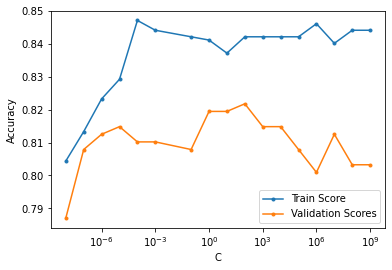

In [74]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

So at about C = 10^-7 we see the smallest gap from the validation score and the train score with the train being ~81% and validation ~81% (validation is slightly smaller than train at this instance), so with this value lets take a look at our confusion matrix and our validation scores

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
# 1. Instantiate model
my_logreg = LogisticRegression(C=10**-7,solver='lbfgs', random_state=1)

# 2. Fit model
my_logreg.fit(X_train, y_train);

C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aydin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

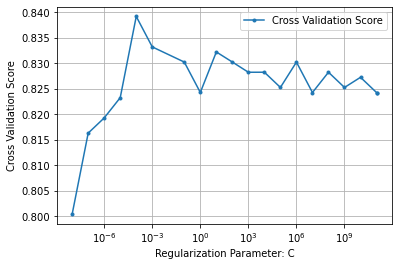

In [77]:
#Store the results
cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000,100000000000,100000000000])

# loop that saves our values to find the optimal C value
for c in C_range:
    # fit the log reg model
    LR_model = LogisticRegression(C=c,random_state=1)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(LR_model, X_train, y_train, cv = 5))
    # save our scores
    cross_validation_scores.append(cv_score)
# plot to find optimal C
plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

we have our peek at C = 10^-4 but at 10^3 we see the values stay in the 82.5%-83% range, so 10^3 is a good value for C

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

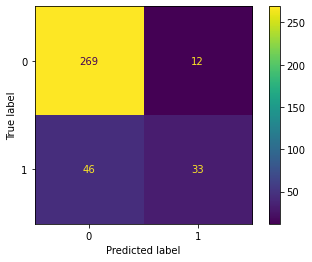

In [79]:
# Get class predictions
y_pred = my_logreg.predict(X_test)

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# display the confuision matrix
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

TN: 269 players were correctly predicted to not be lottery picks and were not

FP: 12 players were incorrectly predicted to be lottery picks

TP: 46 people were correctly predicted to be lottery picks who actually were

FP: 33 people were incorrectly predicted to be lottery picks but were not

In [80]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       281
           1       0.73      0.42      0.53        79

    accuracy                           0.84       360
   macro avg       0.79      0.69      0.72       360
weighted avg       0.83      0.84      0.82       360



So for those not in the lottery we have good scores all around in precision at 85%, recall at 96% and f1-score at 90%, so we're doing a good job saying that players who are not lottery picks are not lottery picks. Again this is due largely in part that a lot of players don't meet expectations in the long run, or aren't viewed as corner stone players to build around which in theory reduces their oppurtunties to play and improve

Where we struggle is with those that are lottery picks. All three values for precision, recall and f1-score are all poor except precision which is plausible. This is due to players exceeding expectations being drafted out of the lottery, examples are Hall of Famers and future Hall of Famers Manu Ginobli who was drafted at 59, Jimmy Butler 30, Giannis Antetkoumpo at 15 and so forth. So these guys were viewed as prospects who turned out to be worth the patience.

***NOTE: I have not scaled because, the massive differences help identify who's truly a lottery pick or not. As well, statistics need to remain the same to view as these all have a good meaning to describing a player.

# KNN

In [83]:
# Train-Test-Split the data
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.5, random_state=1)

#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# Fit the model
KNN_model2 = KNeighborsClassifier(n_neighbors=5)
KNN_model2.fit(X_train, y_train.astype(int))
train_pred = KNN_model2.predict(X_train)
test_pred = KNN_model2.predict(X_test)

print(accuracy_score(train_pred,y_train))
print(accuracy_score(test_pred,y_test))

0.8398220244716351
0.7855555555555556


In [85]:
t_acc = []
tr_acc = []
for i in range(1,10):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train, y_train)
    train_pred = KNN_model.predict(X_train)
    test_pred = KNN_model.predict(X_test)
    print(accuracy_score(train_pred,y_train),accuracy_score(test_pred,y_test),i)
    
    t_acc.append(test_pred)
    tr_acc.append(train_pred)

0.9988876529477196 0.7555555555555555 1
0.8665183537263627 0.7911111111111111 2
0.8720800889877642 0.7666666666666667 3
0.8498331479421579 0.7966666666666666 4
0.8398220244716351 0.7855555555555556 5
0.8342602892102335 0.7922222222222223 6
0.8398220244716351 0.79 7
0.8298109010011123 0.8011111111111111 8
0.8464961067853171 0.8022222222222222 9


8 neighbours seems to be optimal

In [94]:
ks = np.arange(60)+1
list1 = []
list2 = []
for k in ks:
    KNN_model = KNeighborsClassifier(n_neighbors=k) 
    KNN_model.fit(X_train, y_train)
    train_pred = KNN_model.predict(X_train)
    test_pred = KNN_model.predict(X_test)
    list1.append(accuracy_score(test_pred,y_test))
    list2.append(accuracy_score(train_pred,y_train))

0.9988876529477196 0.7555555555555555
0.8665183537263627 0.7911111111111111
0.8720800889877642 0.7666666666666667
0.8498331479421579 0.7966666666666666
0.8398220244716351 0.7855555555555556
0.8342602892102335 0.7922222222222223
0.8398220244716351 0.79
0.8298109010011123 0.8011111111111111
0.8464961067853171 0.8022222222222222
0.8375973303670745 0.81
0.8409343715239155 0.8088888888888889
0.8320355951056729 0.8066666666666666
0.8342602892102335 0.8011111111111111
0.8275862068965517 0.8011111111111111
0.8286985539488321 0.7955555555555556
0.8242491657397107 0.8077777777777778
0.8242491657397107 0.7977777777777778
0.8153503893214683 0.8033333333333333
0.8275862068965517 0.7977777777777778
0.8231368186874305 0.8044444444444444
0.8264738598442715 0.8022222222222222
0.8264738598442715 0.8066666666666666
0.8253615127919911 0.81
0.8253615127919911 0.8144444444444444
0.8264738598442715 0.8111111111111111
0.8275862068965517 0.8144444444444444
0.8331479421579533 0.8177777777777778
0.82869855394883

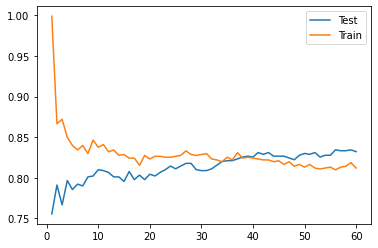

In [95]:
plt.figure()
plt.plot(ks,list1,label='Test')
plt.plot(ks,list2,label='Train')
plt.legend()
plt.show()

so at 8 we see a small gap, but at neighbours = ~32 we see the smallest margin

I have just included my results of KNN which is 80-85% accurate and although shows promise, this isn't the technique I will be using to make comparisons as clustering will be more beneficial and easier to show comparisons, this model as well as logit can be used later as a going forward to see other results

# NBA Clustering

I'm going to use draft number as, round doesn't mean much here and with 60 picks we can correctly predict to the finest percent

In [104]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [215]:
# silhouette score & silhouette samples
from sklearn.metrics import silhouette_score, silhouette_samples

# silhouette_visualizer from yellowbrick.cluster
from yellowbrick.cluster import silhouette_visualizer
# Import ElbowVisualizer
from yellowbrick.cluster import kelbow_visualizer

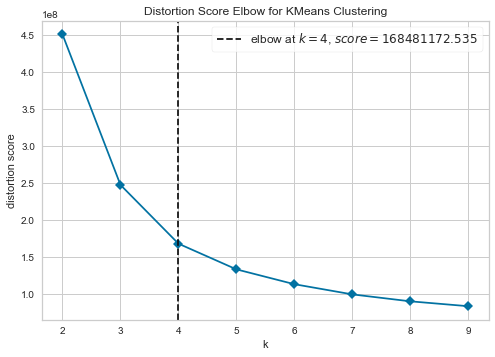

In [216]:
kelbow_visualizer(KMeans(random_state=1), X, k=(2,10), timings=False);

In [217]:
sns.pairplot(nba);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002BF80E87160> (for post_execute):


KeyboardInterrupt: 

The pair plot above is to just show that clustering exists between variables

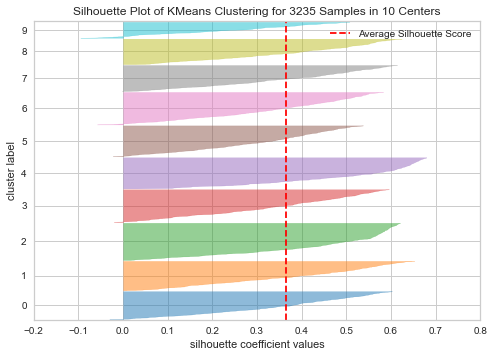

In [218]:
silhouette_visualizer(KMeans(n_clusters=10, random_state=1), career_avg, colors='tab10');

Bivariate clustering where we have many features, I have chosen the sub matrix of OWS to PTS from the previous prelim analysis as these correlation matrix was very correlated between them

In [219]:
new_a = career_avg.loc[:,'OWS':'PTS']
new_a

,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,3.37,2.42,5.79,0.12,-0.51,0.42,-0.08,1.28,265.44,538.11,...,0.71,198.67,364.06,562.72,81.61,61.28,31.22,83.78,143.39,718.22
A.J. Bramlett,-0.20,0.10,-0.20,-0.13,-10.50,-6.30,-16.80,-0.20,4.00,21.00,...,0.68,12.00,10.00,22.00,0.00,1.00,0.00,3.00,13.00,8.00
A.J. English,-0.20,0.70,0.55,0.02,-2.25,-2.85,-5.10,-1.20,308.50,709.00,...,0.77,70.00,87.50,157.50,160.00,28.50,12.00,101.50,143.50,751.00
A.J. Guyton,0.10,-0.03,0.10,-0.14,-6.07,-4.93,-11.00,-0.33,55.33,146.67,...,0.81,7.33,19.33,26.67,49.00,6.67,4.00,20.67,19.33,147.33
A.J. Hammons,-0.20,0.20,0.00,-0.00,-7.50,1.90,-5.60,-0.10,17.00,42.00,...,0.45,8.00,28.00,36.00,4.00,1.00,13.00,10.00,21.00,48.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zelmo Beaty*,1.10,1.20,2.30,0.09,-2.70,0.40,-2.30,-0.10,136.00,310.00,...,0.80,93.00,234.00,327.00,74.00,45.00,29.00,12.80,130.00,380.00
Zendon Hamilton,0.18,0.19,0.40,0.05,-6.01,-2.91,-8.95,-0.16,22.88,51.75,...,0.68,23.38,36.00,59.38,4.12,5.38,3.50,14.25,27.50,76.38
Zoran Dragic,-0.07,0.00,-0.03,-0.05,-1.93,-4.77,-6.70,-0.07,7.33,20.00,...,0.59,3.33,2.00,5.33,3.33,1.33,0.00,3.33,4.00,18.67


In [220]:
a.columns
a = a.drop(columns=['index'])

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [221]:
# instantiate scaler
ss = StandardScaler().fit(new_a)

# transform
X_s = data=ss.transform(new_a)

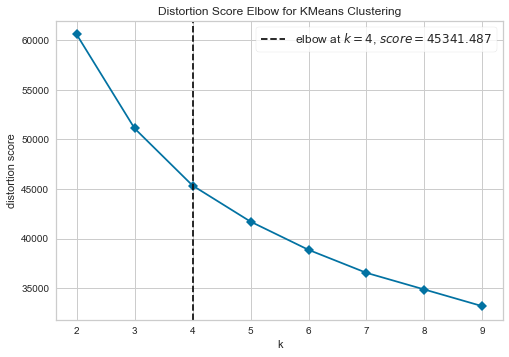

In [222]:
kelbow_visualizer(KMeans(random_state=1), X_s, k=(2,10), timings=False);

so 4 clusters is optimal

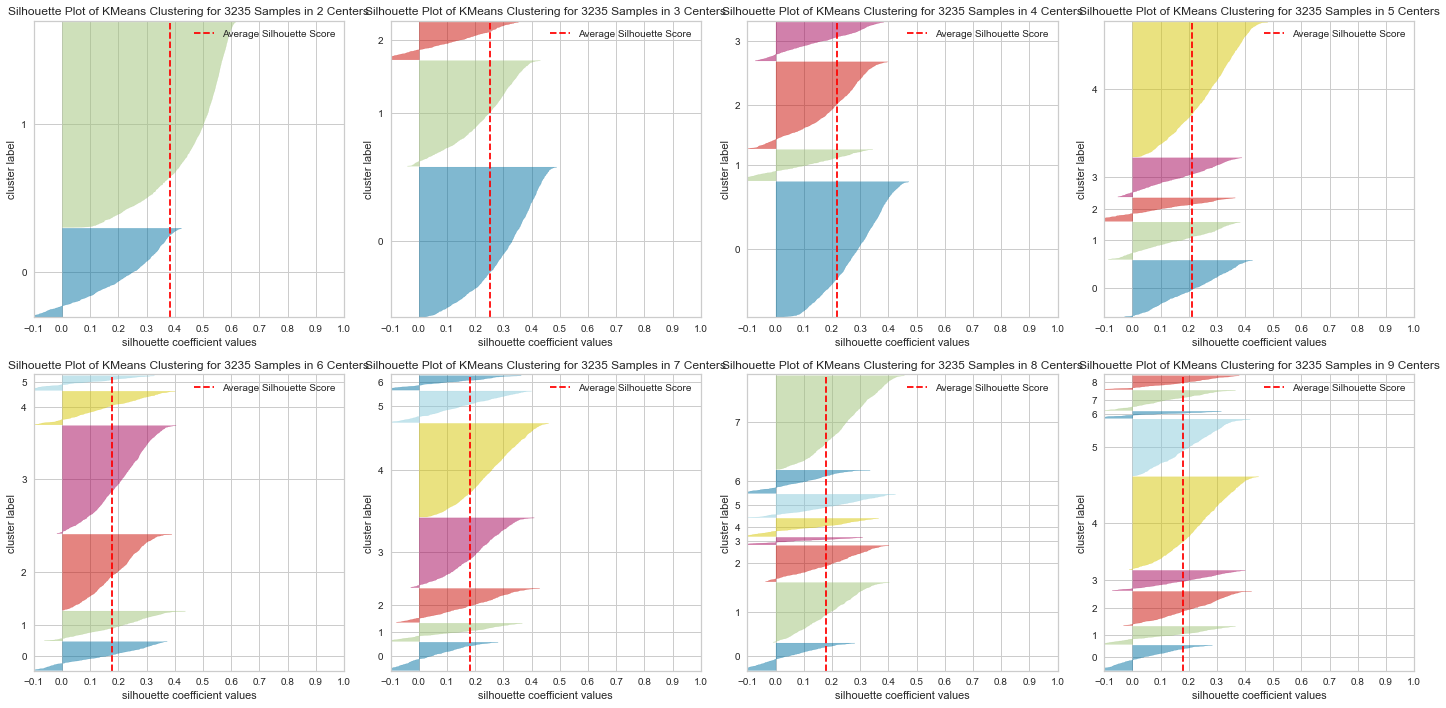

In [223]:
# number of subplot rows and columns
nrows = 2
ncols = 4
# create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20,10))
# row and col position of a subplot
row = col =0
for k in range(2, 10):
    # subplot to plot on
    ax = axes[row][col]
    silhouette_visualizer(KMeans(n_clusters=k, random_state=1), X_s, colors='yellowbrick', ax=axes[row][col], show=False)
    col += 1
    # when at the end of subplot column, jump to next subplot row
    if col % ncols == 0:
        col = 0
        row += 1
    ax.set_xlim((-0.1, 1))
plt.tight_layout()
plt.show()

Out of all the scores, 4 does look the best as 

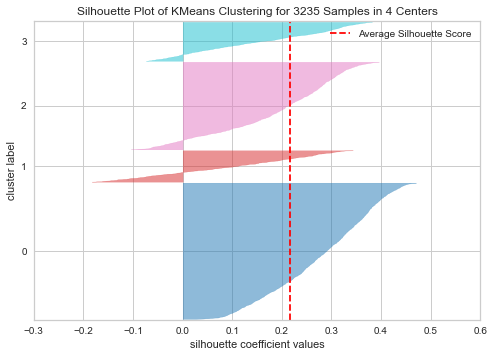

In [224]:
# silhouette curve
silhouette_visualizer(KMeans(n_clusters=4, random_state=1), X_s, colors='tab10');

the silhouette score has an average of ~0.21 which is ok, and the clusters do look the most even in terms of fluctation of size and it makes sense that one cluster here 1 is small as not everyone can become top 10 players of the league etc.

In [225]:
# K-means model with 4 clusters
km4 = KMeans(n_clusters=4, random_state=1).fit(X_s)

In [226]:
X_labeled = new_a.copy()
X_labeled["labels"] = km4.labels_
X_labeled

,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,labels
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,3.37,2.42,5.79,0.12,-0.51,0.42,-0.08,1.28,265.44,538.11,...,198.67,364.06,562.72,81.61,61.28,31.22,83.78,143.39,718.22,1
A.J. Bramlett,-0.20,0.10,-0.20,-0.13,-10.50,-6.30,-16.80,-0.20,4.00,21.00,...,12.00,10.00,22.00,0.00,1.00,0.00,3.00,13.00,8.00,3
A.J. English,-0.20,0.70,0.55,0.02,-2.25,-2.85,-5.10,-1.20,308.50,709.00,...,70.00,87.50,157.50,160.00,28.50,12.00,101.50,143.50,751.00,2
A.J. Guyton,0.10,-0.03,0.10,-0.14,-6.07,-4.93,-11.00,-0.33,55.33,146.67,...,7.33,19.33,26.67,49.00,6.67,4.00,20.67,19.33,147.33,3
A.J. Hammons,-0.20,0.20,0.00,-0.00,-7.50,1.90,-5.60,-0.10,17.00,42.00,...,8.00,28.00,36.00,4.00,1.00,13.00,10.00,21.00,48.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zelmo Beaty*,1.10,1.20,2.30,0.09,-2.70,0.40,-2.30,-0.10,136.00,310.00,...,93.00,234.00,327.00,74.00,45.00,29.00,12.80,130.00,380.00,2
Zendon Hamilton,0.18,0.19,0.40,0.05,-6.01,-2.91,-8.95,-0.16,22.88,51.75,...,23.38,36.00,59.38,4.12,5.38,3.50,14.25,27.50,76.38,0
Zoran Dragic,-0.07,0.00,-0.03,-0.05,-1.93,-4.77,-6.70,-0.07,7.33,20.00,...,3.33,2.00,5.33,3.33,1.33,0.00,3.33,4.00,18.67,0


<Figure size 3600x3600 with 0 Axes>

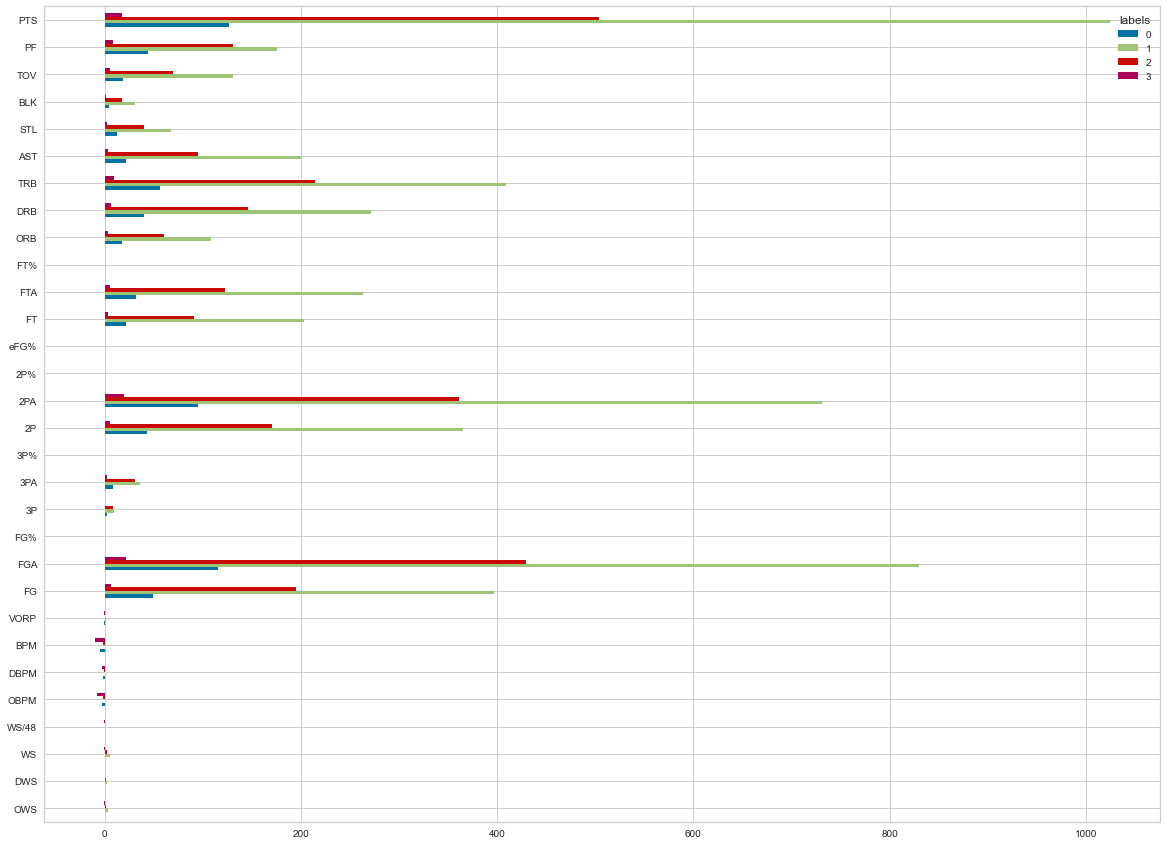

In [227]:
plt.figure(figsize=(50,50))
X_labeled.groupby("labels").median().transpose().plot(figsize=(20,15), kind="barh")
plt.savefig('new_a_clusters.png')
plt.show()

so cluster 1 is clearly the players that are star, 2 are rising stars and above average players, 0 are bench warmers and 3 are those who were never given the oppurtunity

So in terms of oppurtunites cluster 1 clearly had a huge advantage as these were generally higher drafted picks or lower but possessed intangibles that made them a long term prospect to invest in. FGA, 2PA, FTA, TOV and PF are all stats in which the more minutes you play the more of these you will accumlate i.e. more shots to shoot and miss or score, turning the ball over and fouls. In terms of actual production, cluster 1 has a huge discrepnacy in terms of some key stats in PTS, 2P, FT, TRB, AST and FG. These are statistics that if you are good at specifics things like shooting you will have more shots made from 2 or 3 and passing in terms of assits.

In [228]:
X_labeled[X_labeled['labels'] ==1]

,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,labels
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,3.37,2.42,5.79,0.12,-0.51,0.42,-0.08,1.28,265.44,538.11,...,198.67,364.06,562.72,81.61,61.28,31.22,83.78,143.39,718.22,1
Adrian Dantley*,6.66,1.43,8.11,0.18,3.65,-1.35,2.30,2.63,485.11,905.42,...,136.26,200.16,336.42,171.26,58.16,9.84,153.19,156.26,1382.84,1
Al Horford,3.96,3.09,7.06,0.16,0.73,2.24,2.95,2.72,392.30,742.70,...,147.20,413.60,560.80,192.60,53.40,78.40,103.10,153.70,924.00,1
Al Jefferson,2.80,2.53,5.34,0.13,-0.55,0.40,-0.17,1.13,465.38,933.54,...,155.69,424.85,580.54,101.31,47.08,82.31,91.54,175.46,1083.92,1
Alex English*,4.75,1.47,6.23,0.12,2.38,-1.20,1.18,2.20,659.53,1302.88,...,179.24,240.94,420.18,269.12,67.06,52.65,179.28,190.18,1584.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World B.,3.95,0.94,4.90,0.10,1.64,-2.64,-1.03,1.06,477.40,1047.80,...,73.33,102.07,175.40,240.60,67.13,15.87,140.31,167.40,1313.20,1
Xavier McDaniel,1.86,1.92,3.79,0.08,-0.24,-0.34,-0.56,1.04,447.36,919.36,...,161.07,258.21,419.29,140.14,61.93,33.00,147.93,201.50,1069.93,1
Yao Ming*,4.59,3.64,8.25,0.19,0.09,1.59,1.65,2.14,422.50,805.62,...,154.12,407.62,561.75,96.12,23.62,115.00,163.88,199.50,1155.88,1


In [229]:
X_labeled[X_labeled['labels'] ==2]

,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,labels
Player,,,,,,,,,,,,,,,,,,,,,
A.J. English,-0.20,0.70,0.55,0.02,-2.25,-2.85,-5.10,-1.20,308.50,709.00,...,70.00,87.50,157.50,160.00,28.50,12.00,101.50,143.50,751.00,2
Aaron Brooks,0.87,0.66,1.55,0.05,-0.10,-2.47,-2.57,0.03,188.60,459.53,...,21.53,69.13,90.67,165.67,31.27,7.53,84.80,102.93,522.60,2
Aaron Gordon,1.83,1.53,3.37,0.09,-0.80,0.27,-0.57,0.80,253.33,550.67,...,105.33,255.00,360.33,103.67,48.00,39.00,64.33,136.00,660.33,2
Aaron James,1.56,1.06,2.64,0.08,-0.94,-2.10,-3.08,-0.34,321.80,669.40,...,109.80,184.20,294.00,74.00,31.60,13.80,56.82,194.40,765.80,2
Aaron McKie,0.82,1.79,2.64,0.09,-1.54,1.32,-0.22,0.82,150.24,348.41,...,34.12,144.65,178.76,144.82,64.12,11.71,72.06,110.71,390.35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yi Jianlian,-0.26,0.92,0.62,0.02,-4.48,-0.74,-5.22,-0.82,162.60,402.40,...,75.80,192.00,267.80,38.40,27.20,36.80,60.40,123.60,429.60,2
Zach LaVine,1.23,0.37,1.63,0.04,0.47,-2.50,-2.07,-0.03,348.33,782.00,...,24.00,176.33,200.33,222.00,54.67,12.33,144.33,151.67,939.00,2
Zaid Abdul-Aziz,0.70,0.89,1.60,0.06,-1.87,-0.48,-2.31,0.19,141.10,326.20,...,63.90,146.40,310.30,51.20,23.60,23.80,12.98,86.70,366.90,2


In [230]:
X_labeled[X_labeled['labels'] ==3]

,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,labels
Player,,,,,,,,,,,,,,,,,,,,,
A.J. Bramlett,-0.20,0.10,-0.20,-0.13,-10.50,-6.30,-16.80,-0.20,4.00,21.00,...,12.00,10.00,22.00,0.0,1.00,0.0,3.00,13.00,8.00,3
A.J. Guyton,0.10,-0.03,0.10,-0.14,-6.07,-4.93,-11.00,-0.33,55.33,146.67,...,7.33,19.33,26.67,49.0,6.67,4.0,20.67,19.33,147.33,3
A.J. Wynder,-0.10,0.00,0.00,-0.05,-5.90,-3.50,-9.40,-0.10,3.00,12.00,...,1.00,2.00,3.00,8.0,1.00,0.0,4.00,1.00,12.00,3
A.W. Holt,-0.10,0.00,-0.10,-0.40,-1.80,0.10,-1.70,0.00,1.00,8.00,...,72.00,149.25,4.00,0.0,26.00,19.0,13.90,1.00,4.00,3
Aaron Harrison,-0.15,0.05,-0.05,-0.08,-7.60,-1.00,-8.55,-0.05,2.50,11.50,...,2.00,7.00,9.00,2.5,3.00,0.0,2.00,6.00,9.50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xavier Silas,-0.10,0.00,-0.10,-0.13,-6.80,-3.70,-10.50,-0.10,4.00,15.00,...,2.00,2.00,4.00,3.0,0.00,0.0,3.00,5.00,11.00,3
Yaroslav Korolev,-0.10,0.05,0.00,-0.04,-4.80,-1.75,-6.55,-0.10,6.50,23.00,...,3.00,5.00,8.00,6.5,3.00,0.0,3.50,5.50,19.50,3
Yinka Dare,-0.50,0.32,-0.18,-0.21,-14.32,-2.28,-16.62,-0.48,21.50,54.25,...,25.25,45.00,70.25,1.0,3.00,17.5,24.00,44.75,58.25,3


In [231]:
X_labeled[X_labeled['labels'] ==0]

,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,labels
Player,,,,,,,,,,,,,,,,,,,,,
A.J. Hammons,-0.20,0.20,0.00,-0.00,-7.50,1.90,-5.60,-0.10,17.00,42.00,...,8.00,28.00,36.00,4.00,1.00,13.00,10.00,21.00,48.00,0
A.J. Price,0.12,0.41,0.56,0.02,-1.51,-2.66,-4.14,-0.06,66.67,175.67,...,8.22,37.22,45.44,68.11,14.67,1.00,27.00,28.00,184.00,0
Aaron Gray,0.15,0.52,0.65,0.06,-3.09,0.70,-2.36,0.03,46.27,91.55,...,47.09,80.82,127.91,22.82,10.27,9.64,28.55,72.36,112.27,0
Aaron Swinson,0.00,0.00,0.00,0.04,-2.90,-2.90,-5.80,0.00,10.00,18.00,...,3.00,5.00,8.00,3.00,1.00,0.00,5.00,8.00,24.00,0
Aaron Williams,0.74,0.82,1.58,0.05,-4.62,0.08,-4.54,0.13,88.85,178.85,...,57.95,100.75,158.70,26.25,16.00,29.85,37.10,101.50,230.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zarko Cabarkapa,0.18,0.32,0.50,0.10,-1.44,-3.58,-5.02,-0.26,64.00,145.00,...,26.60,56.20,82.80,22.00,8.60,6.00,29.80,56.00,175.60,0
Zeljko Rebraca,0.56,0.69,1.24,0.10,-3.07,-0.37,-3.49,-0.06,74.57,143.29,...,31.29,75.29,106.57,13.43,8.86,24.43,31.43,80.57,195.29,0
Zendon Hamilton,0.18,0.19,0.40,0.05,-6.01,-2.91,-8.95,-0.16,22.88,51.75,...,23.38,36.00,59.38,4.12,5.38,3.50,14.25,27.50,76.38,0


So cluster 0 has the most in terms of those who were bench warmers in terms of number of entries, 2 in rising stars and above average players at 2nd, 3 in prospects as 3rd and 4th in stars.

In [232]:
X_labeled.to_csv('~/Downloads/nba_clusters.csv')

## NCAA clustering

In [167]:
lotto = pd.read_csv('~/Downloads/2021 draft stats.csv')

In [168]:
lotto['Unnamed: 23'].loc[0] = 'Cade Cunningham'
lotto['Unnamed: 23'].loc[1] = 'Evan Mobley'
lotto['Unnamed: 23'].loc[2] = 'Jalen Suggs'
lotto['Unnamed: 23'].loc[3] = 'Scottie Barnes'

C:\Users\aydin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [169]:
lotto = lotto.rename({'Unnamed: 23':'name'},axis='columns')

In [170]:
lotto

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,name
0,27,35.4,6.5,14.8,0.438,4.2,9.1,0.461,2.3,5.7,...,0.7,5.5,6.2,3.5,1.6,0.8,4.0,2.5,20.1,Cade Cunningham
1,33,33.9,6.0,10.3,0.578,5.6,9.1,0.615,0.4,1.2,...,2.7,5.9,8.7,2.4,0.8,2.9,2.2,1.8,16.4,Evan Mobley
2,28,28.4,5.0,10.0,0.502,3.9,6.7,0.588,1.1,3.4,...,0.6,4.9,5.5,4.5,1.9,0.3,3.0,2.6,14.0,Jalen Suggs
3,24,24.8,4.1,8.1,0.503,3.6,6.5,0.561,0.5,1.7,...,1.5,2.5,4.0,4.1,1.5,0.5,2.5,2.2,10.3,Scottie Barnes
4,32,33.8,5.2,12.1,0.427,3.3,7.0,0.478,1.8,5.1,...,2.0,3.8,5.8,1.6,1.0,0.7,1.6,2.3,16.8,Moses Moody
5,27,25.5,4.1,9.1,0.449,3.6,7.4,0.492,0.5,1.8,...,1.1,2.4,3.5,2.5,1.1,0.4,2.6,2.4,11.3,Keon Johnson
6,135,27.2,4.0,8.3,0.484,2.1,3.5,0.583,2.0,4.8,...,1.0,3.1,4.0,1.4,0.7,0.3,1.0,1.6,11.5,Corey Kispert
7,53,19.7,2.3,4.1,0.553,1.9,3.0,0.627,0.4,1.1,...,1.5,2.5,4.0,0.5,0.7,1.0,1.1,2.3,6.2,Kai Jones
8,55,31.2,4.3,9.3,0.465,2.9,5.0,0.583,1.4,4.3,...,0.8,5.3,6.1,2.0,1.3,0.8,1.4,2.4,12.0,Franz Wagner
9,20,27.9,3.8,10.2,0.374,2.7,6.2,0.427,1.2,4.0,...,0.5,4.1,4.6,2.2,0.9,0.6,2.9,2.4,10.7,Ziaire Williams


In [171]:
weight = [220,215,205,225,205,185,220,220,220,185,190]
height = ['6-8','7-0','6-4','6-9','6-6','6-5','6-7','6-11','6-9','6-8','6-5']
position = ['PG/SG','PF/C','PG','SF/PF','SG','SG/SF','SG/SF','C','SF/PF','SG/SF','SG']
college_name = ['Oklahoma State','USC','Gonzaga','Florida St.','Arkansas','Tennessee','Gonzaga','Texas',
                'Michigan','Stanford','UConn']    

In [172]:
name = lotto['name']

In [173]:
lotto.drop(columns='name',inplace=True)
lotto

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,27,35.4,6.5,14.8,0.438,4.2,9.1,0.461,2.3,5.7,...,0.846,0.7,5.5,6.2,3.5,1.6,0.8,4.0,2.5,20.1
1,33,33.9,6.0,10.3,0.578,5.6,9.1,0.615,0.4,1.2,...,0.694,2.7,5.9,8.7,2.4,0.8,2.9,2.2,1.8,16.4
2,28,28.4,5.0,10.0,0.502,3.9,6.7,0.588,1.1,3.4,...,0.762,0.6,4.9,5.5,4.5,1.9,0.3,3.0,2.6,14.0
3,24,24.8,4.1,8.1,0.503,3.6,6.5,0.561,0.5,1.7,...,0.621,1.5,2.5,4.0,4.1,1.5,0.5,2.5,2.2,10.3
4,32,33.8,5.2,12.1,0.427,3.3,7.0,0.478,1.8,5.1,...,0.812,2.0,3.8,5.8,1.6,1.0,0.7,1.6,2.3,16.8
5,27,25.5,4.1,9.1,0.449,3.6,7.4,0.492,0.5,1.8,...,0.703,1.1,2.4,3.5,2.5,1.1,0.4,2.6,2.4,11.3
6,135,27.2,4.0,8.3,0.484,2.1,3.5,0.583,2.0,4.8,...,0.827,1.0,3.1,4.0,1.4,0.7,0.3,1.0,1.6,11.5
7,53,19.7,2.3,4.1,0.553,1.9,3.0,0.627,0.4,1.1,...,0.677,1.5,2.5,4.0,0.5,0.7,1.0,1.1,2.3,6.2
8,55,31.2,4.3,9.3,0.465,2.9,5.0,0.583,1.4,4.3,...,0.835,0.8,5.3,6.1,2.0,1.3,0.8,1.4,2.4,12.0
9,20,27.9,3.8,10.2,0.374,2.7,6.2,0.427,1.2,4.0,...,0.796,0.5,4.1,4.6,2.2,0.9,0.6,2.9,2.4,10.7


In [175]:
lotto.insert(0,'college',college_name)
lotto.insert(1,'height',height)

ValueError: cannot insert college, already exists

In [176]:
lotto.insert(2,'name',name)
lotto.insert(3,'position',position)
lotto.insert(4,'weight',weight)

In [177]:
new_lotto = lotto.reindex(columns=['college',
 'height',
 'name',
 'position',
 'weight',
 '3PA',
 '3P%',
 '3P',
 'FGA',
 'FG%',
 'FG',
 'FT%',
 'FTA',
 'FT',
 'G',
 'PTS'])

In [178]:
new_lotto

,college,height,name,position,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS
0,Oklahoma State,6-8,Cade Cunningham,PG/SG,220,5.7,0.400,2.3,14.8,0.438,6.5,0.846,5.8,4.9,27,20.1
1,USC,7-0,Evan Mobley,PF/C,215,1.2,0.300,0.4,10.3,0.578,6.0,0.694,5.8,4.1,33,16.4
2,Gonzaga,6-4,Jalen Suggs,PG,205,3.4,0.330,1.1,10.0,0.502,5.0,0.762,3.8,2.9,28,14.0
3,Florida St.,6-9,Scottie Barnes,SF/PF,225,1.7,0.275,0.5,8.1,0.503,4.1,0.621,2.8,1.7,24,10.3
4,Arkansas,6-6,Moses Moody,SG,205,5.1,0.358,1.8,12.1,0.427,5.2,0.812,5.8,4.7,32,16.8
5,Tennessee,6-5,Keon Johnson,SG/SF,185,1.8,0.271,0.5,9.1,0.449,4.1,0.703,3.7,2.6,27,11.3
6,Gonzaga,6-7,Corey Kispert,SG/SF,220,4.8,0.411,2.0,8.3,0.484,4.0,0.827,1.8,1.5,135,11.5
7,Texas,6-11,Kai Jones,C,220,1.1,0.345,0.4,4.1,0.553,2.3,0.677,1.8,1.2,53,6.2
8,Michigan,6-9,Franz Wagner,SF/PF,220,4.3,0.325,1.4,9.3,0.465,4.3,0.835,2.4,2.0,55,12.0
9,Stanford,6-8,Ziaire Williams,SG/SF,185,4.0,0.291,1.2,10.2,0.374,3.8,0.796,2.5,2.0,20,10.7


In [191]:
clustered_data = ncaa.append(new_lotto,ignore_index=True)
clustered_data.drop(columns=['active_from','active_to','birth_date'],inplace=True)


In [192]:
clustered_data

,college,height,name,position,url,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS
0,Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,0.0,0.288,0.0,5.6,0.5990,3.30,0.728,2.50,1.80,134.0,8.5
1,Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,0.1,0.222,0.0,9.7,0.5455,5.15,0.662,4.05,2.75,93.5,13.4
2,"University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,0.0,0.250,0.0,16.8,0.6390,10.70,0.628,7.90,5.00,88.0,26.4
3,Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,7.2,0.372,2.7,21.9,0.4740,10.40,0.863,6.40,5.50,64.0,29.0
4,"University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,0.9,0.333,0.3,9.6,0.5110,4.90,0.700,3.90,2.70,107.0,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,Gonzaga,6-7,Corey Kispert,SG/SF,NaN,220.0,4.8,0.411,2.0,8.3,0.4840,4.00,0.827,1.80,1.50,135.0,11.5
4248,Texas,6-11,Kai Jones,C,NaN,220.0,1.1,0.345,0.4,4.1,0.5530,2.30,0.677,1.80,1.20,53.0,6.2
4249,Michigan,6-9,Franz Wagner,SF/PF,NaN,220.0,4.3,0.325,1.4,9.3,0.4650,4.30,0.835,2.40,2.00,55.0,12.0
4250,Stanford,6-8,Ziaire Williams,SG/SF,NaN,185.0,4.0,0.291,1.2,10.2,0.3740,3.80,0.796,2.50,2.00,20.0,10.7


In [193]:
cluster_ncaa = clustered_data.loc[:,'weight':]

In [194]:
cluster_ncaa

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS
0,240.0,0.0,0.288,0.0,5.6,0.5990,3.30,0.728,2.50,1.80,134.0,8.5
1,235.0,0.1,0.222,0.0,9.7,0.5455,5.15,0.662,4.05,2.75,93.5,13.4
2,225.0,0.0,0.250,0.0,16.8,0.6390,10.70,0.628,7.90,5.00,88.0,26.4
3,162.0,7.2,0.372,2.7,21.9,0.4740,10.40,0.863,6.40,5.50,64.0,29.0
4,223.0,0.9,0.333,0.3,9.6,0.5110,4.90,0.700,3.90,2.70,107.0,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...
4247,220.0,4.8,0.411,2.0,8.3,0.4840,4.00,0.827,1.80,1.50,135.0,11.5
4248,220.0,1.1,0.345,0.4,4.1,0.5530,2.30,0.677,1.80,1.20,53.0,6.2
4249,220.0,4.3,0.325,1.4,9.3,0.4650,4.30,0.835,2.40,2.00,55.0,12.0
4250,185.0,4.0,0.291,1.2,10.2,0.3740,3.80,0.796,2.50,2.00,20.0,10.7


In [195]:
# instantiate scaler
ss = StandardScaler().fit(cluster_ncaa)

# transform
X_s = data=ss.transform(cluster_ncaa)

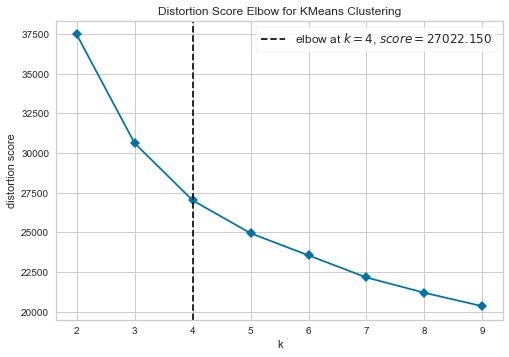

In [196]:
kelbow_visualizer(KMeans(random_state=1), X_s, k=(2,10), timings=False);

Again, 4 clusters is optimal for this data set

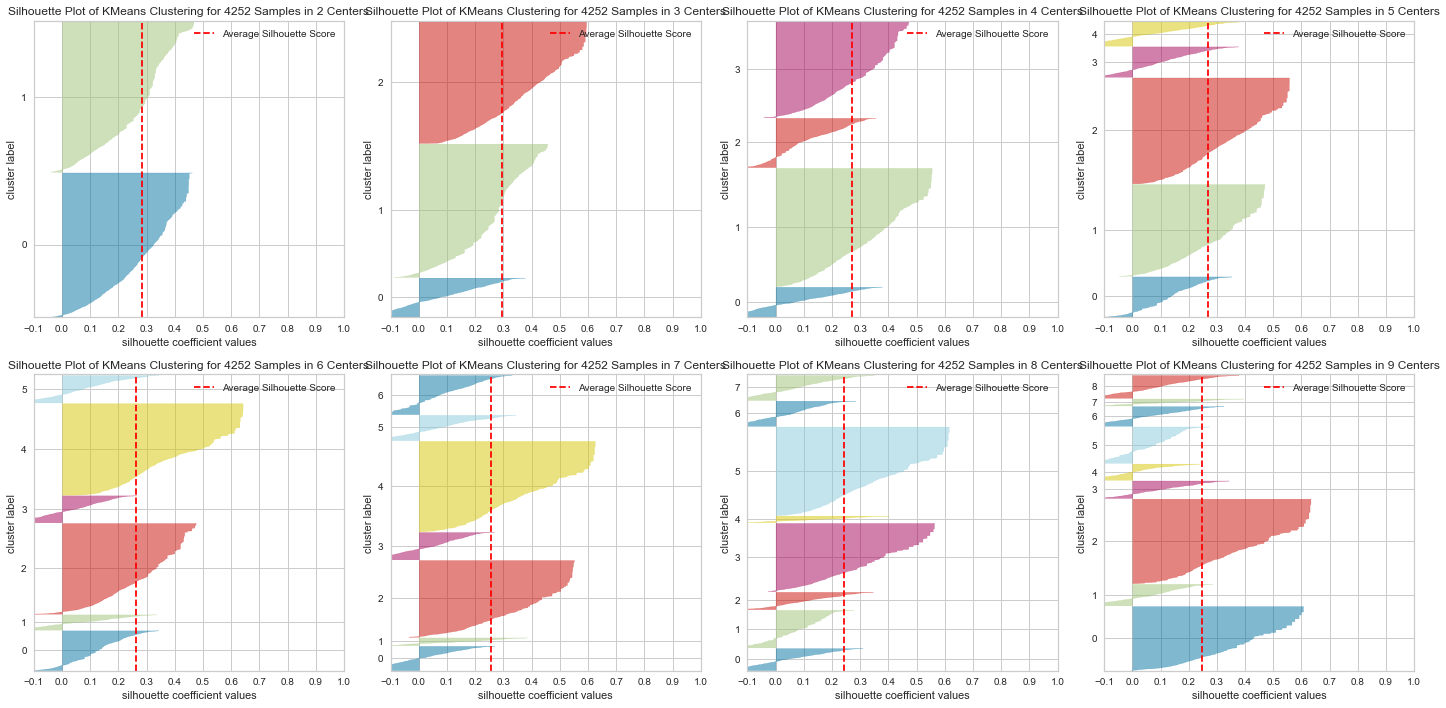

In [197]:
# number of subplot rows and columns
nrows = 2
ncols = 4
# create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20,10))
# row and col position of a subplot
row = col =0
for k in range(2, 10):
    # subplot to plot on
    ax = axes[row][col]
    silhouette_visualizer(KMeans(n_clusters=k, random_state=1), X_s, colors='yellowbrick', ax=axes[row][col], show=False)
    col += 1
    # when at the end of subplot column, jump to next subplot row
    if col % ncols == 0:
        col = 0
        row += 1
    ax.set_xlim((-0.1, 1))
plt.tight_layout()
plt.show()

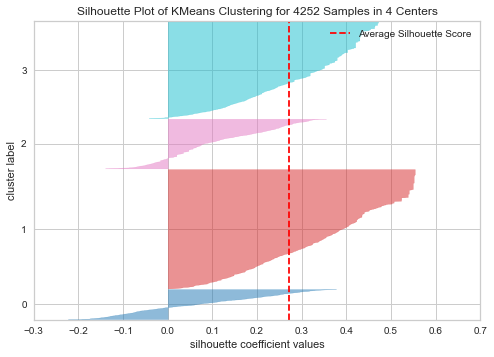

In [198]:
# silhouette curve
silhouette_visualizer(KMeans(n_clusters=4, random_state=1), X_s, colors='tab10');

silhouette score average of about ~0.27 which is ok, the fluctation of sizes is 2, in the sense that there are 2 big chunks which are longer term NCAA players who may be develop in the NCAA or never make the jump to the NCAA and the other 2 clusters are those that make the jump but again 60 players maximum from the NCAA can make the NBA through the draft.

In [199]:
# K-means model with 4 clusters
km4 = KMeans(n_clusters=4, random_state=1).fit(X_s)

In [200]:
X_labeled = clustered_data.copy()
X_labeled["labels"] = km4.labels_
X_labeled

,college,height,name,position,url,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
0,Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,0.0,0.288,0.0,5.6,0.5990,3.30,0.728,2.50,1.80,134.0,8.5,2
1,Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,0.1,0.222,0.0,9.7,0.5455,5.15,0.662,4.05,2.75,93.5,13.4,3
2,"University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,0.0,0.250,0.0,16.8,0.6390,10.70,0.628,7.90,5.00,88.0,26.4,0
3,Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,7.2,0.372,2.7,21.9,0.4740,10.40,0.863,6.40,5.50,64.0,29.0,0
4,"University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,0.9,0.333,0.3,9.6,0.5110,4.90,0.700,3.90,2.70,107.0,13.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,Gonzaga,6-7,Corey Kispert,SG/SF,NaN,220.0,4.8,0.411,2.0,8.3,0.4840,4.00,0.827,1.80,1.50,135.0,11.5,1
4248,Texas,6-11,Kai Jones,C,NaN,220.0,1.1,0.345,0.4,4.1,0.5530,2.30,0.677,1.80,1.20,53.0,6.2,2
4249,Michigan,6-9,Franz Wagner,SF/PF,NaN,220.0,4.3,0.325,1.4,9.3,0.4650,4.30,0.835,2.40,2.00,55.0,12.0,1
4250,Stanford,6-8,Ziaire Williams,SG/SF,NaN,185.0,4.0,0.291,1.2,10.2,0.3740,3.80,0.796,2.50,2.00,20.0,10.7,1


<Figure size 3600x3600 with 0 Axes>

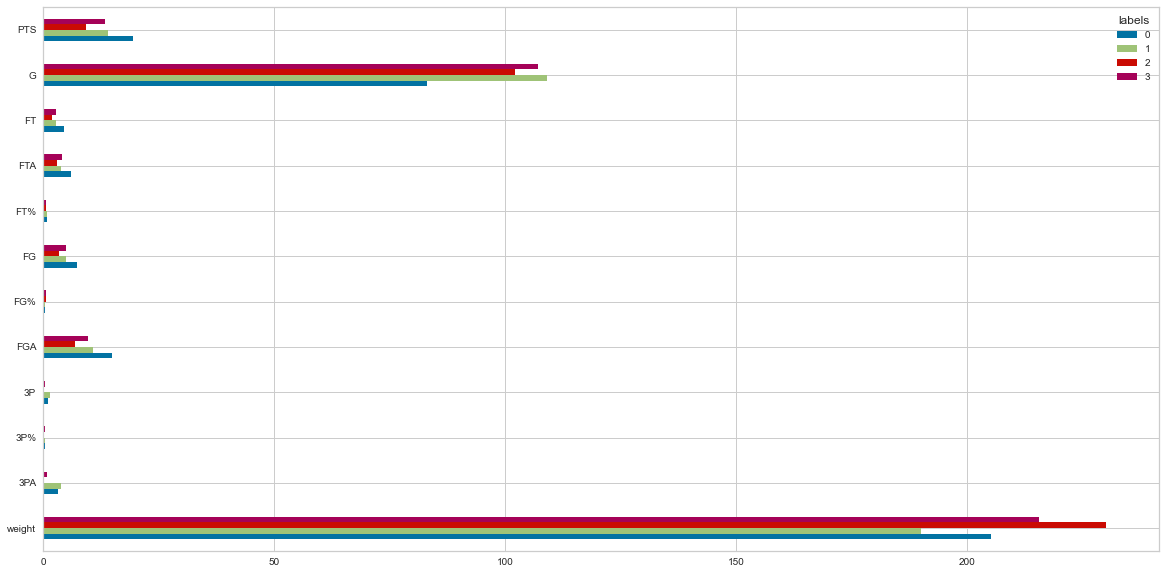

In [201]:
plt.figure(figsize=(50,50))
X_labeled.groupby("labels").median().transpose().plot(figsize=(20,10), kind="barh")

plt.savefig('COLLEGE_CLUSTERS.png')
plt.show()

In [202]:
X_labeled.to_csv('~/Downloads/ncca_clusters.csv')

Cluster 0: 1 and done players, i.e. players who are project top 10 picks who play 1 year in the NCAA to be elgible in the draft

Cluster 1: 1+ year products who develop for the most part in the NCAA before being drafted

cluster 2: These seem to be later picks, more of the prospects kind of players where teams would invest time for them to improve in the NBA setting

cluster 3: very similar to cluster 1, seem to be slightly worse players than them

NOTE: I did not model NCAA stats as I was very limited to what I could find readily available as websites that hosts these stats are quite picky on web scrapping and do ban IP's, going forward I would set up a VPN to web scrap all the NCAA stats on basketballreference.com's website. The clustering done helps make accurate NCAA comparisons for the NBA to compare with Bleacher Report and DraftNet